In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isna().count()  ##No null value

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

# Take a subset of the dataset to drop unique columns, differentiate Target and features dataset & Encode the features

In [7]:
df = data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Target column is exited and remaining columns in df are features

In [10]:
df["Gender"]=df["Gender"].replace({"Male":0})
df["Gender"]=df["Gender"].replace({"Female":1})  #Encoding the Gender column
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df["Geography"]=df["Geography"].replace({"France":0})     
df["Geography"]=df["Geography"].replace({"Germany":1})     #Encoding Geography column
df["Geography"]=df["Geography"].replace({"Spain":2})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Removing outlier

In [13]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BEA4A7C88>,
      dtype=object)

In [14]:
new_df = df.drop(["Exited"],axis=1)
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [16]:
Q1=new_df.quantile(0.25)
Q3=new_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

CreditScore           134.0000
Geography               1.0000
Gender                  1.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
dtype: float64


In [17]:
new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#new_df.loc[2498:2550,:]
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10
5,645,2,0,44,8,113755.78,2,1,0,149756.71
6,822,0,0,50,7,0.00,2,1,1,10062.80
8,501,0,0,44,4,142051.07,2,0,1,74940.50
9,684,0,0,27,2,134603.88,1,1,1,71725.73
10,528,0,0,31,6,102016.72,2,0,0,80181.12


In [18]:
a = new_df[new_df["NumOfProducts"]==4]        ##if we remove outliers, numofproduct with count 4 is getting eliminated. 
a

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BEAC64780>,
      dtype=object)

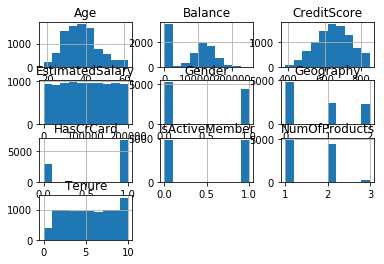

In [19]:
new_df.hist()     ##We cannot lose this data though the count is low. Therefore not removing outliers from this data set.

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


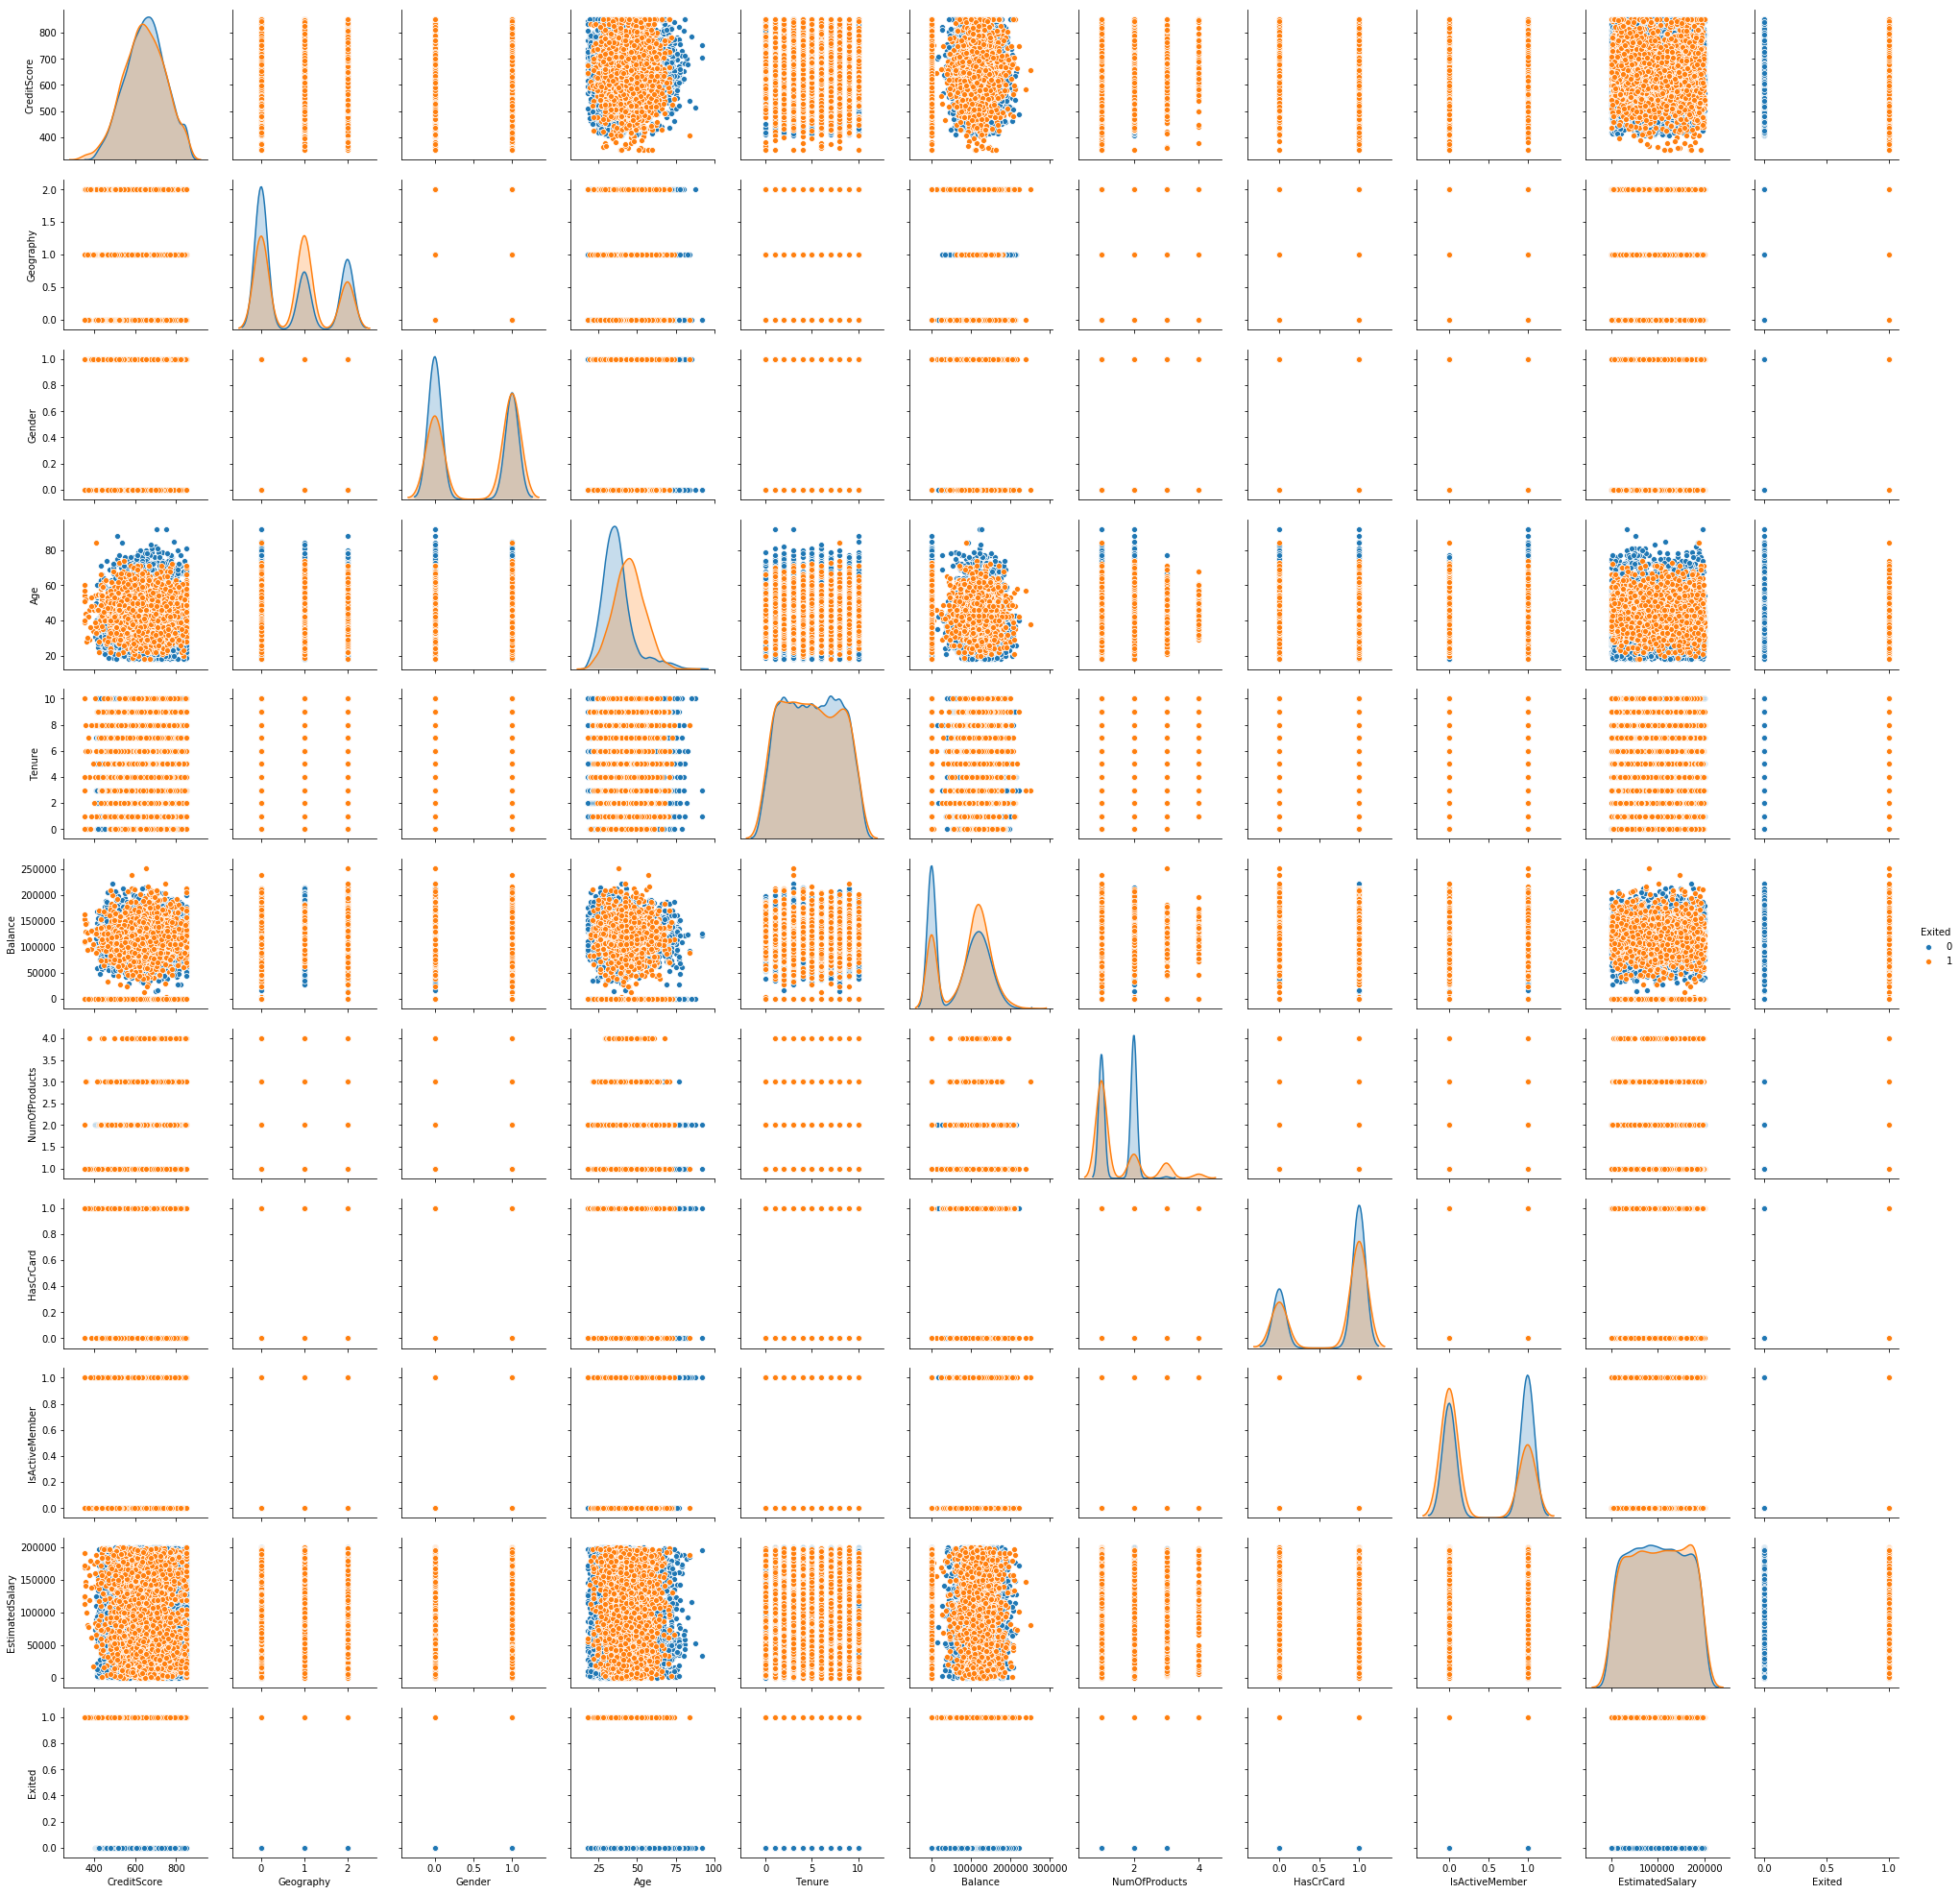

In [20]:
import seaborn as sns

sns.pairplot(df, diag_kind = 'kde',hue='Exited')

# Split the data randomly into train and test dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.iloc[:,0:10]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [23]:
y=df.iloc[:,10:11]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
X_train.shape

(7000, 10)

In [26]:
X_test.shape

(3000, 10)

# Normalize Train and Test Data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)   # Define the scaler 

X_train = scaler.transform(X_train)   # Scaling the training set

X_test = scaler.transform(X_test)  # Scaling the test set

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Build the DL model

In [70]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#from tensorflow_core.python.keras.utils.data_utils import Sequence

# define the model architecture

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(10,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [71]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [72]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1,  validation_split=.3, verbose=0)
history

# Predict the result

In [73]:
y_predict = model.predict(X_test)
y_predict

array([[0.01865786],
       [0.0480234 ],
       [0.15219443],
       ...,
       [0.06553342],
       [0.        ],
       [0.140751  ]], dtype=float32)

# Print Accuracy Score

model training accuracy : [0.7697959, 0.80918366, 0.82510203, 0.8385714, 0.844898, 0.8471429, 0.8489796, 0.84816325, 0.8471429, 0.8485714, 0.85163265, 0.8530612, 0.854898, 0.85, 0.8530612, 0.8542857, 0.8579592, 0.85510206, 0.8534694, 0.8565306]
model validation accuracy :  [0.81285715, 0.82285714, 0.8414286, 0.8347619, 0.8414286, 0.8495238, 0.84619045, 0.8490476, 0.8466667, 0.84761906, 0.8452381, 0.8466667, 0.8433333, 0.84761906, 0.8509524, 0.8452381, 0.84809524, 0.85238093, 0.84761906, 0.85142857]
model test accuracy :  0.85966665


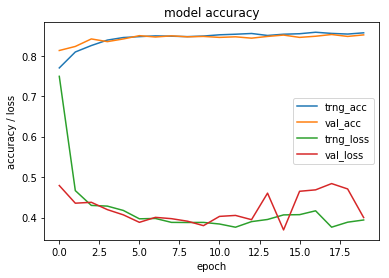

In [74]:
import matplotlib.pyplot as plt
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("model training accuracy :" , history.history['accuracy'])
print("model validation accuracy : ", history.history['val_accuracy'])
print("model test accuracy : ", acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()